<a href="https://colab.research.google.com/github/Monsoon94/ADP/blob/main/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÏßÄÎèÑÌïôÏäµ Î∂ÑÎ•ò

In [ ]:
#Ï†ÄÏû• Ïûò ÎêòÎäîÏßÄ ÌôïÏù∏

# Í≤∞Ï†ïÌä∏Î¶¨(Desicion Tree)

## Ï£ºÏöî ÌååÎùºÎØ∏ÌÑ∞

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Î∂ÑÎ•òÏö©
clf = DecisionTreeClassifier(
    criterion="gini",        # Î∂ÑÌï† Í∏∞Ï§Ä: "gini"(Í∏∞Î≥∏), "entropy", "log_loss"
    splitter="best",         # Î∂ÑÌï† Î∞©Ïãù: "best"(Í∏∞Î≥∏), "random"
    max_depth=None,          # Ìä∏Î¶¨ ÏµúÎåÄ ÍπäÏù¥ (None = Ï†úÌïú ÏóÜÏùå)
    min_samples_split=2,     # ÎÇ¥Î∂Ä ÎÖ∏ÎìúÎ•º Î∂ÑÌï†ÌïòÍ∏∞ ÏúÑÌïú ÏµúÏÜå ÏÉòÌîå Ïàò
    min_samples_leaf=1,      # Î¶¨ÌîÑ ÎÖ∏ÎìúÍ∞Ä Í∞ÄÏ†∏Ïïº ÌïòÎäî ÏµúÏÜå ÏÉòÌîå Ïàò
    min_weight_fraction_leaf=0.0, # Í∞ÄÏ§ëÏπò Í∏∞Ï§Ä Î¶¨ÌîÑ ÏµúÏÜå ÏÉòÌîå ÎπÑÏú®
    max_features=None,       # Î∂ÑÌï† Ïãú Í≥†Î†§Ìï† ÏµúÎåÄ ÌîºÏ≤ò Ïàò
    random_state=42,         # Í≤∞Í≥º Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú ÎÇúÏàò Í≥†Ï†ï
    max_leaf_nodes=None,     # Î¶¨ÌîÑ ÎÖ∏Îìú ÏµúÎåÄ Í∞úÏàò
    min_impurity_decrease=0.0, # Î∂ÑÌï†ÏùÑ ÏúÑÌïú ÏµúÏÜå Î∂àÏàúÎèÑ Í∞êÏÜåÎüâ
    class_weight=None        # ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {0:1, 1:5} ÎòêÎäî "balanced"
)

Train Accuracy: 0.9523809523809523
Test Accuracy: 1.0


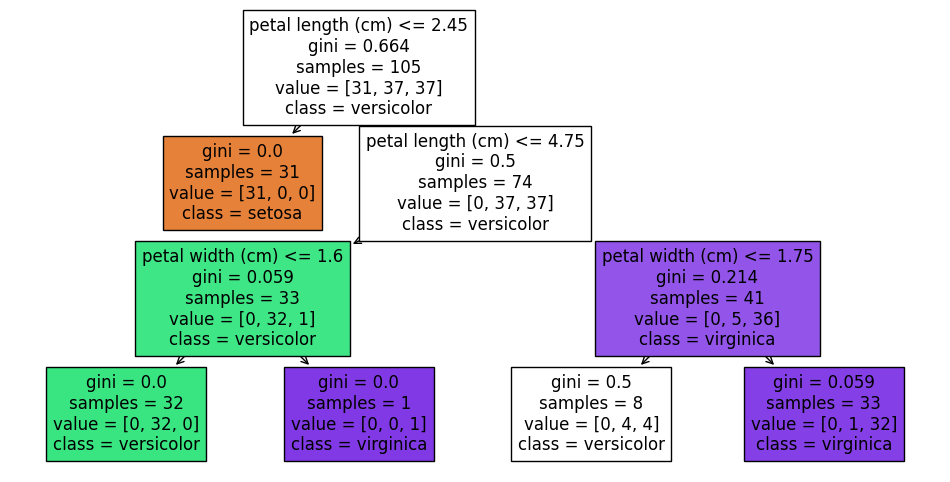

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Í≤∞Ï†ïÌä∏Î¶¨ Î∂ÑÎ•òÍ∏∞
clf = DecisionTreeClassifier(
    criterion="gini",   # or "entropy"
    max_depth=3,
    random_state=42
)
clf.fit(X_train, y_train)

# Ï†ïÌôïÎèÑ
print("Train Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

# Ìä∏Î¶¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.show()

## Í∑∏Î¶¨Îìú ÏÑúÏπò

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2, 3, 5, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Best Score: 0.9428571428571428


## ÌäπÏÑ± Ï§ëÏöîÎèÑ

In [ ]:
import pandas as pd

feature_importances = clf.feature_importances_
print(pd.DataFrame({
    "Feature": load_iris().feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False))

             Feature  Importance
2  petal length (cm)    0.925108
3   petal width (cm)    0.074892
1   sepal width (cm)    0.000000
0  sepal length (cm)    0.000000


# ÏïôÏÉÅÎ∏î(Ensemble)

# Bagging
üìò 1Ô∏è‚É£ Í∞úÎÖê ÏöîÏïΩ

Bagging (Bootstrap Aggregating)

Ïó¨Îü¨ Í∞úÏùò Î™®Îç∏ÏùÑ ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú ÌïôÏäµÏãúÏºú ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌèâÍ∑†(ÌöåÍ∑Ä) ÎòêÎäî Ìà¨Ìëú(Î∂ÑÎ•ò)Î°ú Í≤∞Ìï©ÌïòÎäî Î∞©Î≤ï.

Ï¶â, Îç∞Ïù¥ÌÑ∞Î•º Îã§ÏñëÌïòÍ≤å Î≥ÄÌòïÌïòÏó¨ Ïó¨Îü¨ Î™®Îç∏ÏùÑ ÌïôÏäµ ‚Üí ÏòàÏ∏°ÏùÑ Ï¢ÖÌï© ‚Üí ÏïàÏ†ïÏ†Å Í≤∞Í≥º ÎèÑÏ∂ú.

üìä 2Ô∏è‚É£ ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥

Î™®Îç∏ ÌïòÎÇòÌïòÎÇòÍ∞Ä ‚ÄúÎ∂àÏïàÏ†ï(unstable)‚ÄùÌïòÎ©¥, Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÏù¥ Ï°∞Í∏àÎßå Î∞îÎÄåÏñ¥ÎèÑ ÏòàÏ∏°Ïù¥ ÌÅ¨Í≤å Îã¨ÎùºÏßê

Ïó¨Îü¨ Í∞úÏùò Î™®Îç∏ÏùÑ Î¨¥ÏûëÏúÑ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎ°ú Í∞ÅÍ∞Å ÌïôÏäµÏãúÏºú, Í∞úÎ≥Ñ ÏòàÏ∏°ÏùÑ ÌèâÍ∑† ÎòêÎäî Îã§ÏàòÍ≤∞Î°ú Ìï©Ïπ®

Ïù¥Î†áÍ≤å ÌïòÎ©¥ Ïò§Î•òÍ∞Ä ÏÉÅÏáÑÎêòÍ≥†, Î™®Îç∏ Ï†ÑÏ≤¥Ïùò Î∂ÑÏÇ∞(variance) Ïù¥ Ï§ÑÏñ¥Îì¶

‚öôÔ∏è 3Ô∏è‚É£ ÏûëÎèô ÏõêÎ¶¨

üîπ Step 1. Bootstrap Sampling (Î∂ÄÌä∏Ïä§Ìä∏Îû© ÏÉòÌîåÎßÅ)

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï§ëÎ≥µ ÌóàÏö©ÏúºÎ°ú nÍ∞úÏùò ÏÉòÌîåÏùÑ ÎûúÎç§ÌïòÍ≤å Ï∂îÏ∂ú

Ïù¥ Í≥ºÏ†ïÏùÑ Ïó¨Îü¨ Î≤à Î∞òÎ≥µÌï¥ Ïó¨Îü¨ Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±

üîπ Step 2. Í∞úÎ≥Ñ Î™®Îç∏ ÌïôÏäµ
Í∞Å Î∂ÄÌä∏Ïä§Ìä∏Îû© ÏÉòÌîåÎ°ú ÎèôÏùºÌïú Î™®Îç∏(Ïòà: DecisionTree)ÏùÑ ÌïôÏäµ

Ï¶â, ÏÑúÎ°ú Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Î•º Î≥∏ Ïó¨Îü¨ ‚ÄúÏïΩÌïú ÌïôÏäµÍ∏∞(weak learners)‚Äù ÏÉùÏÑ±

üîπ Step 3. Aggregation (Í≤∞Ìï©)

Î∂ÑÎ•ò ‚Üí Îã§ÏàòÍ≤∞ Ìà¨Ìëú(voting)

ÌöåÍ∑Ä ‚Üí ÌèâÍ∑†(averaging)


## Ï£ºÏöî ÌååÎùºÎØ∏ÌÑ∞

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# base model ÏÑ†ÌÉù
base_model = DecisionTreeClassifier(
        max_depth=None,
        random_state=0)

# bagging classifier
clf = BaggingClassifier(
    estimator= base_model,     # base_estimatorÎäî deprecated ‚Üí estimator ÏÇ¨Ïö©(1.2 Î≤ÑÏ†Ñ Ïù¥ÌõÑ)
    n_estimators=100,          # Í∞úÎ≥Ñ Î™®Îç∏ Ïàò
    max_samples=1.0,           # Î∂ÄÌä∏Ïä§Ìä∏Îû© ÏÉòÌîå ÌÅ¨Í∏∞ (ÎπÑÏú®/Ï†ïÏàò)
    max_features=1.0,          # Í∞Å Ï∂îÏ†ïÍ∏∞Ïóê ÏÇ¨Ïö©Ìï† ÌîºÏ≤ò Ïàò (ÎπÑÏú®/Ï†ïÏàò) ‚Üí Feature bagging
    bootstrap=True,            # ÏÉòÌîå Î∂ÄÌä∏Ïä§Ìä∏Îû©
    bootstrap_features=False,  # ÌîºÏ≤ò Î∂ÄÌä∏Ïä§Ìä∏Îû©
    oob_score=True,            # OOB(out-of-bag) Í≤ÄÏ¶ù ÏÇ¨Ïö©
    n_jobs=-1,                 # Î≥ëÎ†¨ Ï≤òÎ¶¨
    random_state=42,           # Ïû¨ÌòÑÏÑ±
    verbose=0,                 # Î°úÍ∑∏
    warm_start=False           # TrueÎ©¥ Ï∂îÌõÑ Îçî ÎßéÏùÄ Ï∂îÏ†ïÍ∏∞Î•º Ïù¥Ïñ¥Î∂ôÏó¨ ÌïôÏäµ Í∞ÄÎä•
)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

clf.fit(X_tr, y_tr)
pred = clf.predict(X_te)
print("Accuracy:", accuracy_score(y_te, pred))

if clf.oob_score:
    print("OOB Score:", clf.oob_score_)  # ÌõàÎ†® Ï§ë ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞Îêú ÏùºÎ∞òÌôî ÏÑ±Îä• Ï∂îÏ†ïÏπò


Accuracy: 0.9333333333333333
OOB Score: 0.9523809523809523


# Voting Classifier

## Ï£ºÏöî ÌååÎùºÎØ∏ÌÑ∞

In [ ]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators=[        # (Ïù¥Î¶Ñ, Î™®Îç∏) ÌäúÌîå Î¶¨Ïä§Ìä∏
        ("lr",  log_reg_model),
        ("svc", svc_model),
        ("tree",tree_model),
    ],
    voting="hard",      # "hard": Îã§ÏàòÍ≤∞, "soft": ÌôïÎ•† ÌèâÍ∑†
    weights=None,       # Í∞Å Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπò (Î¶¨Ïä§Ìä∏). NoneÏù¥Î©¥ ÎèôÏùº Í∞ÄÏ§ë. 3Í∞ú Î™®Îç∏Ïù¥Î©¥ [1, 2, 1] ÌëúÌòÑ
    n_jobs=None,        # Î≥ëÎ†¨ Ï∂îÎ°†(ÏùºÎ∂Ä Ï∂îÏ†ïÍ∏∞Îßå), ÌïôÏäµÏùÄ Í∞Å Ï∂îÏ†ïÍ∏∞ ÎÇ¥Î∂Ä Í∑úÏπô Îî∞Î¶Ñ
    flatten_transform=True,  # transform() Ï∂úÎ†• Î™®Ïñë Ï†úÏñ¥
    verbose=False
)

# Ï£ºÏùò! voting="soft"Î•º Ïì∞Î†§Î©¥ Î™®Îì† Íµ¨ÏÑ± Î™®Îç∏Ïù¥ predict_proba Î•º ÏßÄÏõêÌï¥Ïïº Ìï©ÎãàÎã§.
#(SVCÎäî probability=True ÎòêÎäî CalibratedClassifierCV ÌïÑÏöî

ÏÇ¨Ïö© ÏòàÏ†ú

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X, y = load_iris(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

# base models
lr   = LogisticRegression(max_iter=500, random_state=42)
svc  = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True, random_state=42)  # soft ÏúÑÌï¥ probability=True
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# Hard voting
hard = VotingClassifier(estimators=[("lr", lr), ("svc", svc), ("tree", tree)], voting="hard")
hard.fit(X_tr, y_tr)
print("Hard Voting Acc:", accuracy_score(y_te, hard.predict(X_te)))

# Soft voting
soft = VotingClassifier(estimators=[("lr", lr), ("svc", svc), ("tree", tree)], voting="soft")
soft.fit(X_tr, y_tr)
print("Soft Voting Acc:", accuracy_score(y_te, soft.predict(X_te)))

Hard Voting Acc: 0.9555555555555556
Soft Voting Acc: 0.9333333333333333


ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÌÜµÌïú Íµ¨Ï∂ï

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr   = make_pipeline(StandardScaler(with_mean=False),
                     LogisticRegression(max_iter=500, random_state=42))
svc  = make_pipeline(StandardScaler(),
                     SVC(probability=True, random_state=42))
tree = DecisionTreeClassifier(max_depth=5, random_state=42)

vc = VotingClassifier(
    estimators=[("lr", lr), ("svc", svc), ("tree", tree)],
    voting="soft",            # ÌôïÎ•† ÌèâÍ∑†
    weights=[1, 2, 1]         # ÏÑ±Îä• Ï¢ãÏùÄ Î™®Îç∏ Í∞ÄÏ§ë ‚Üë
).fit(X_tr, y_tr)

#
print("Soft Voting Acc:", accuracy_score(y_te, vc.predict(X_te)))

Soft Voting Acc: 0.9555555555555556


ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ + Í∑∏Î¶¨Îìú ÏÑúÏπò

In [ ]:
from sklearn.model_selection import GridSearchCV

# voting models
lr   = LogisticRegression(max_iter=500, random_state=42)
svc  = SVC(probability=True, random_state=42)
tree = DecisionTreeClassifier(random_state=42)

vc = VotingClassifier(estimators=[("lr", lr), ("svc", svc), ("tree", tree)], voting="soft")

# ÌååÎùºÎØ∏ÌÑ∞ Ïù¥Î¶ÑÏùÄ "<Î≥ÑÏπ≠>__<ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞>" ÌòïÏãù. (estimators=[("lr", ...), ...] ÏóêÏÑú Ï†ïÌïú Î≥ÑÏπ≠ ÏÇ¨Ïö©)
param_grid = {
    "svc__C": [0.5, 1.0, 2.0],
    "svc__gamma": ["scale", 0.1, 0.01],
    "lr__C": [0.5, 1.0, 2.0],
    "tree__max_depth": [3, 5, None],
    "weights": [[1,1,1], [1,2,1], [2,2,1]]
}

grid = GridSearchCV(vc, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_tr, y_tr)
print("Best params:", grid.best_params_)
print("CV best score:", grid.best_score_)
best_model = grid.best_estimator_

Best params: {'lr__C': 0.5, 'svc__C': 0.5, 'svc__gamma': 'scale', 'tree__max_depth': 3, 'weights': [1, 1, 1]}
CV best score: 0.9619047619047618


# Stacking classifier

## Ï£ºÏöî ÌååÎùºÎØ∏ÌÑ∞

In [ ]:
from sklearn.ensemble import StackingClassifier

sc = StackingClassifier(
    estimators=[ ... ],          # [(Ïù¥Î¶Ñ, Î™®Îç∏), ...]
    final_estimator=None,        # Í∏∞Î≥∏: LogisticRegression
    cv=5,                        # OOF Î∂ÑÌï† Ïàò (int, CV Í∞ùÏ≤¥ Í∞ÄÎä•)
    stack_method='auto',         # 'auto'|'predict_proba'|'decision_function'|'predict'
    passthrough=False,           # TrueÎ©¥ ÏõêÎ≥∏ XÎ•º Î©îÌÉÄÎ™®Îç∏ ÏûÖÎ†•Ïóê Ìï®Íªò Ï†ÑÎã¨
    n_jobs=None,                 # ÏùºÎ∂Ä Ï∂îÏ†ïÍ∏∞ Î≥ëÎ†¨Ìôî
    verbose=0
)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X, y = load_iris(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

# Î≤†Ïù¥Ïä§ Î™®Îç∏: ÏÑúÎ°ú ÏÑ±Í≤©Ïù¥ Îã§Î•∏ Î™®Îç∏ Ï°∞Ìï© Í∂åÏû•
lr   = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(max_iter=500, random_state=42))
svc  = make_pipeline(StandardScaler(), SVC(probability=True, kernel="rbf", random_state=42))
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# Stacking Classifier
stack = StackingClassifier(
    estimators=[("lr", lr), ("svc", svc), ("tree", tree)],
    final_estimator=LogisticRegression(max_iter=500, random_state=42),
    cv=5,                     # OOF ÏÉùÏÑ±
    stack_method="predict_proba",
    passthrough=False,
    n_jobs=-1
).fit(X_tr, y_tr)

print("Stacking Accuracy:", accuracy_score(y_te, stack.predict(X_te)))


Stacking Accuracy: 0.9333333333333333


passthrough = True >> Î©îÌÉÄ Î™®Îç∏

In [ ]:
from sklearn.ensemble import RandomForestClassifier

stack_pt = StackingClassifier(
    estimators=[("lr", lr), ("svc", svc), ("tree", tree)],
    final_estimator=RandomForestClassifier(
        n_estimators=300, max_depth=None, random_state=42, n_jobs=-1
    ),
    cv=5,
    stack_method="predict_proba",
    passthrough=True,
    n_jobs=-1
).fit(X_tr, y_tr)

print("Stacking Accuracy:", accuracy_score(y_te, stack_pt.predict(X_te)))

Stacking Accuracy: 0.9333333333333333


ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ + Í∑∏Î¶¨Îìú ÏÑúÏπò

In [ ]:
from sklearn.model_selection import GridSearchCV

base_lr   = LogisticRegression(max_iter=500, random_state=42)
base_svc  = SVC(probability=True, random_state=42)
base_tree = DecisionTreeClassifier(random_state=42)

stack = StackingClassifier(
    estimators=[("lr", base_lr), ("svc", base_svc), ("tree", base_tree)],
    final_estimator=LogisticRegression(max_iter=500, random_state=42),
    cv=5, stack_method="predict_proba"
)

param_grid = {
    "lr__C": [0.5, 1.0, 2.0],
    "svc__C": [0.5, 1.0, 2.0],
    "svc__gamma": ["scale", 0.1],
    "tree__max_depth": [3, 5, None],
    "final_estimator__C": [0.5, 1.0, 2.0],
    "passthrough": [False, True]
}

grid = GridSearchCV(stack, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_tr, y_tr)
print("Best params:", grid.best_params_)
print("CV best score:", grid.best_score_)
best_stack = grid.best_estimator_


Best params: {'final_estimator__C': 2.0, 'lr__C': 1.0, 'passthrough': True, 'svc__C': 2.0, 'svc__gamma': 'scale', 'tree__max_depth': 5}
CV best score: 0.9714285714285713
